In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
warnings.filterwarnings('ignore')



In [29]:
#importing Dataset
df = pd.read_csv("Water_pond_tanks_2021.csv")

In [30]:
#Eliminating the data that is not useful
drop_col = ["State Name","STN Code","Conductivity (?mhos/cm) (Min)", "Conductivity (?mhos/cm) (Max)", "Total Coliform (MPN/100ml) (Max)", "Fecal Coliform (MPN/100ml) (Max)", "Temperature ºC (Min)", "Temperature ºC (Max)","Dissolved Oxygen (mg/L) (Max)", "BOD (mg/L) (Max)", "Nitrate N + Nitrite N(mg/L) (Max)"]
df = df.drop(drop_col, axis = 1)
df

,Name of Monitoring Location,Type Water Body,Dissolved Oxygen (mg/L) (Min),pH (Min),pH (Max),BOD (mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Min),Fecal Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Min)
0,"KOLLERU LAKE KOKKIRAYALANKA (V), KAILALUR (M)",LAKE,3.2,7.0,8.0,1.6,1.02,9,120
1,"KONDAKARLA-AAVA LAKE, PARAWADA PHARMA CITY, VI...",LAKE,3.0,6.9,7.8,1.9,0.77,15,150
2,"PULICATE LAKE , NELLORE DIST",LAKE,4.2,7.2,8.2,2.4,1.20,3,47
3,"CHENGAMBAKAM TANK IN SRI CITY SEZ,\r\nTIRUPATHI",TANK,5.4,6.3,7.9,1.0,0.34,24,170
4,ANNAMAYYA PROJECT ON CHEYYERU\r\nRESERVOIR,Wetland,5.4,7.3,8.0,1.0,0.35,43,240
...,...,...,...,...,...,...,...,...,...
615,"RABINDRASAROVAR NATIONAL LAKE,\r\nCALCUTTA, WE...",LAKE,5.2,7.2,8.5,1.8,0.30,330,1100
616,SAHEBBANDH AT PURULIA,LAKE,8.8,7.0,7.6,2.7,0.30,3100,4300
617,SINCHAL LAKE FOR DARJEELING,LAKE,7.1,6.9,7.6,1.0,0.30,70,110
618,"WATER RESERVIOR AT DELO LAKE,\r\nDARJELLING",LAKE,7.2,6.9,7.6,1.0,0.30,60,110


In [31]:
df=df.replace('-', np.nan) #Replace the - as missing values
df=df.replace('\n4', '',regex=True)
df.iloc[:,4:17]=df.iloc[:,4:17].astype(float)
df[120:170] #This is just to see if the changing have been done correctly

,Name of Monitoring Location,Type Water Body,Dissolved Oxygen (mg/L) (Min),pH (Min),pH (Max),BOD (mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Min),Fecal Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Min)
120,(MANSAR LAKE AT MID POINT(MANSAR\r\nLAKE),LAKE,7.5,7.4,7.9,1.0,0.02,NaN,NaN
121,"(MANSAR LAKE AT MID POINT(SURINSAR LAKE), J&K",LAKE,6.2,7.9,8.6,3.1,0.03,NaN,NaN
122,ANCHAR LAKE AT CENTRAL SITE,LAKE,3.6,7.3,7.7,1.5,NaN,NaN,NaN
123,ANCHAR LAKE AT JENAB SAHAB SOURA,LAKE,0.5,7.2,7.4,3.3,NaN,NaN,NaN
124,ANCHAR LAKE AT SANGAM,LAKE,1.4,7.2,7.4,2.4,NaN,NaN,NaN
125,ANCHAR LAKE AT SINDH INFLOW,LAKE,3.5,7.3,7.8,1.2,NaN,NaN,NaN
126,ANCHAR LAKE NEAR LKIMS,LAKE,0.7,7.1,7.4,3.5,NaN,NaN,NaN
127,DAL LAKE AT ASHAIBAGH BRIDGE,LAKE,4.3,7.3,8.1,2.0,NaN,NaN,NaN
128,DAL LAKE AT JOGILANKER,LAKE,0.5,7.1,7.7,5.4,NaN,NaN,NaN
129,DAL LAKE AT NAYADYAR,LAKE,0.7,7.1,7.7,4.4,NaN,NaN,NaN


In [32]:
# Iterate over the rows and drop rows with null values
for index, row in df.iterrows():
    if row.isnull().any():
        df = df.drop(index)

# Reset the row indexes
df = df.reset_index(drop=True)
df
# Display the modified dataset

,Name of Monitoring Location,Type Water Body,Dissolved Oxygen (mg/L) (Min),pH (Min),pH (Max),BOD (mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Min),Fecal Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Min)
0,"KOLLERU LAKE KOKKIRAYALANKA (V), KAILALUR (M)",LAKE,3.2,7.0,8.0,1.6,1.02,9.0,120.0
1,"KONDAKARLA-AAVA LAKE, PARAWADA PHARMA CITY, VI...",LAKE,3.0,6.9,7.8,1.9,0.77,15.0,150.0
2,"PULICATE LAKE , NELLORE DIST",LAKE,4.2,7.2,8.2,2.4,1.2,3.0,47.0
3,"CHENGAMBAKAM TANK IN SRI CITY SEZ,\r\nTIRUPATHI",TANK,5.4,6.3,7.9,1.0,0.34,24.0,170.0
4,ANNAMAYYA PROJECT ON CHEYYERU\r\nRESERVOIR,Wetland,5.4,7.3,8.0,1.0,0.35,43.0,240.0
...,...,...,...,...,...,...,...,...,...
543,"RABINDRASAROVAR NATIONAL LAKE,\r\nCALCUTTA, WE...",LAKE,5.2,7.2,8.5,1.8,0.3,330.0,1100.0
544,SAHEBBANDH AT PURULIA,LAKE,8.8,7.0,7.6,2.7,0.3,3100.0,4300.0
545,SINCHAL LAKE FOR DARJEELING,LAKE,7.1,6.9,7.6,1.0,0.3,70.0,110.0
546,"WATER RESERVIOR AT DELO LAKE,\r\nDARJELLING",LAKE,7.2,6.9,7.6,1.0,0.3,60.0,110.0


In [33]:
# Get the unique values from the "water_body" column
unique_values = df['Type Water Body'].unique().tolist()

# Print the list of unique values
print(unique_values)

['LAKE', 'TANK', 'Wetland', 'POND']


In [34]:
desired_order = unique_values
water_body_dtype = pd.CategoricalDtype(desired_order, ordered=True)

# Convert the "water body" column to the new categorical data type
df1 = df
df1['Type Water Body'] = df1['Type Water Body'].astype(water_body_dtype)

# Sort the DataFrame based on the new categorical order
df1 = df1.sort_values('Type Water Body')
df1['target'] = None

# Create a dictionary mapping water body types to target values
target_mapping = {'LAKE': 0, 'TANK': 1, 'Wetland': 2, 'POND': 3}

# Assign values to the "target" column based on the "Type Water Body" column
df1['target'] = df1['Type Water Body'].map(target_mapping)
y=df1['target'].to_numpy()
df1

,Name of Monitoring Location,Type Water Body,Dissolved Oxygen (mg/L) (Min),pH (Min),pH (Max),BOD (mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Min),Fecal Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Min),target
0,"KOLLERU LAKE KOKKIRAYALANKA (V), KAILALUR (M)",LAKE,3.2,7.0,8.0,1.6,1.02,9.0,120.0,0
366,"JALMAHAL, JAIPUR, RAJASTHAN",LAKE,0.5,8.5,9.2,3.2,2.5,93.0,210.0,0
365,"JAISAMAND LAKE, SALUMBER, UDAIPUR, POINT NO. 2...",LAKE,7.2,8.4,8.9,1.3,1.42,39.0,64.0,0
364,"JAISAMAND LAKE, SALUMBER, UDAIPUR, POINT NO. 1...",LAKE,7.1,8.3,9.0,1.2,1.66,23.0,75.0,0
363,"JAISAMAND LAKE, ALWAR, RAJASTHAN",LAKE,4.0,7.2,7.2,1.0,0.74,23.0,64.0,0
...,...,...,...,...,...,...,...,...,...,...
44,"BOR BEEL AT JAKAI., ASSAM",POND,4.0,7.2,7.8,2.0,0.6,300.0,610.0,3
45,BORPUKHURI AT SONARI,POND,5.8,6.8,8.0,2.0,0.6,300.0,360.0,3
46,"BORPUKHURI, NAZIRA, ASSAM",POND,5.6,6.9,7.7,2.0,0.7,300.0,300.0,3
48,"CHAND DUBI BEEL, CHAND DUBI, ASSAM",POND,4.6,7.2,7.7,2.1,0.7,300.0,720.0,3


In [35]:
from sklearn.preprocessing import StandardScaler

# Extract the feature columns into X
X = df1[['Dissolved Oxygen (mg/L) (Min)', 'pH (Min)', 'pH (Max)', 'Nitrate N + Nitrite N(mg/L) (Min)','Fecal Coliform (MPN/100ml) (Min)','Total Coliform (MPN/100ml) (Min)']]

scaler = StandardScaler() # This creats a new OBJECT that has methods and attributes
scaler.fit(X) # Ask our scaler to process the data and calculate all parameteres necessary for the scaling (the means and variances)
print ("Means: ", scaler.mean_) # We can now see what are the parameter values our scaler has calculated, means_ stores the mean values for each feature
print ("Variances: ", scaler.var_) # var_ stores the variances for each feature

Xcentred = scaler.transform(X) # Now ask our scaler to scale the data we pass it using the parameters it has calculated
print ("\nSome of our data :\n", Xcentred[:5])

# We can also do the fit and the transform of our data in a single call
Xcentred = scaler.fit_transform(X)
print ("\nSee that the result is the same if we do everything in a single go :\n", Xcentred[:5])


Means:  [3.65401460e+00 6.98784672e+00 8.04653285e+00 1.27989051e+00
 9.83959854e+02 3.18492810e+04]
Variances:  [5.18452768e+00 2.06260327e-01 2.47889439e-01 4.24297992e+00
 7.24830601e+06 3.56862212e+11]

Some of our data :
 [[-0.19939544  0.02675998 -0.09346104 -0.12616966 -0.36213331 -0.05311412]
 [-1.38518921  3.32956859  2.31673425  0.59232944 -0.33093285 -0.05296346]
 [ 1.55733608  3.10938135  1.71418543  0.06801928 -0.35099029 -0.05320786]
 [ 1.51341779  2.88919411  1.91503504  0.18453265 -0.35693323 -0.05318944]
 [ 0.15195086  0.46713446 -1.7002579  -0.26210192 -0.35693323 -0.05320786]]

See that the result is the same if we do everything in a single go :
 [[-0.19939544  0.02675998 -0.09346104 -0.12616966 -0.36213331 -0.05311412]
 [-1.38518921  3.32956859  2.31673425  0.59232944 -0.33093285 -0.05296346]
 [ 1.55733608  3.10938135  1.71418543  0.06801928 -0.35099029 -0.05320786]
 [ 1.51341779  2.88919411  1.91503504  0.18453265 -0.35693323 -0.05318944]
 [ 0.15195086  0.46713446 

In [36]:
# Use the PCA class of sklearn to calculate the principal components
from sklearn.decomposition import PCA

# Like we did before with the scaler, we define here a PCA OBJECT and initialise it with the number of PCA components we want to use
pca = PCA(n_components=3)

# Ask our PCA object to process the data and calculate all parameteres necessary (the eigenvectors and variances)
pca.fit(Xcentred)

print("\nThese are the calculated components: \n", pca.components_) # The PCA object now contains useful information in its attributes. components_ stores the principal components calculated
print("\nThe components we have found, explain the following percentage of variance: \n", pca.explained_variance_ratio_) # explained_variance_ratio_ stores the percentage of variance each of our components explains

# Now apply the PCA transform on the original data
Xnew = pca.transform(Xcentred)

print("\nOriginal size of our dataset: ", Xcentred.shape)
print("\nReduced size of our dataset: ", Xnew.shape)


These are the calculated components: 
 [[-0.22938762 -0.27577981 -0.21966205  0.01239995  0.67292999  0.60834766]
 [ 0.02266208  0.63182261  0.65030809 -0.19262395  0.19148377  0.32189437]
 [-0.67794039  0.1122076   0.17782143  0.69671564 -0.07806752 -0.06840035]]

The components we have found, explain the following percentage of variance: 
 [0.31010685 0.25943938 0.19576125]

Original size of our dataset:  (548, 6)

Reduced size of our dataset:  (548, 3)


<Figure size 1000x800 with 0 Axes>

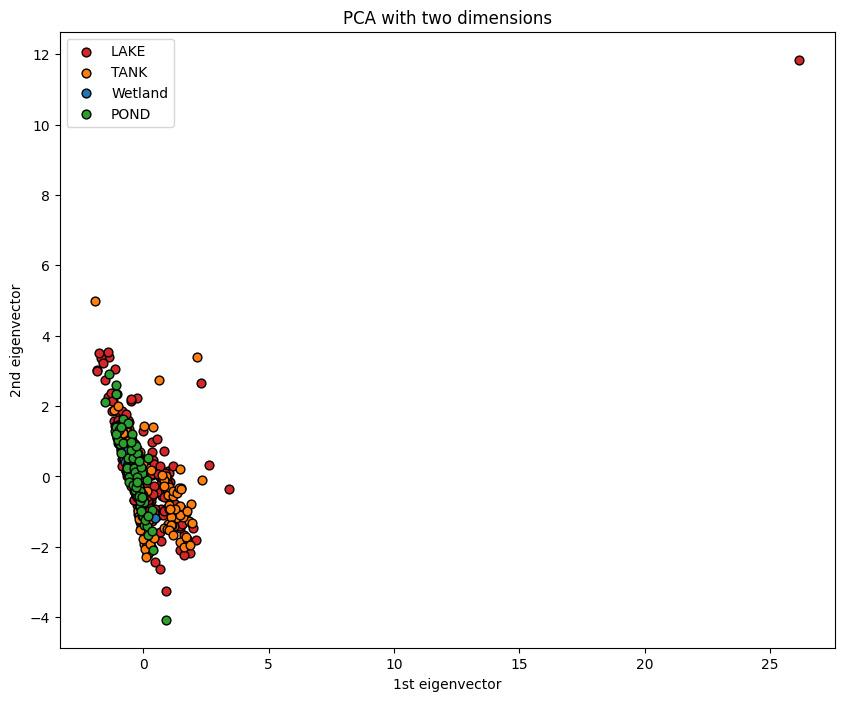

In [37]:
target_names = ['LAKE', 'TANK', 'Wetland', 'POND']

def plot3DScatter(X, y):
    # To get a better understanding of interaction of the dimensions,
    # plot the first three PCA dimensions.
    fig = plt.figure(figsize=(10, 8))
    ax = Axes3D(fig, elev=-150, azim=45)

    # Plot the training points
    for c, name, col in zip(set(y), target_names, ["tab:red", "tab:orange", "tab:blue", "tab:green"]):
        ax.scatter(X[y==c, 0], X[y==c, 1], X[y==c, 2],
                   color=col, edgecolor='k',
                   label=name, s=40)

    ax.set_title("First three PCA directions")
    ax.set_xlabel("1st eigenvector")
    ax.set_ylabel("2nd eigenvector")
    ax.set_zlabel("3rd eigenvector")
    ax.legend()
    plt.show()

plot3DScatter(Xnew,y)

def plot2DScatter(X, y):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    
    # Plot the training points
    for c, name, col in zip(set(y), target_names, ["tab:red", "tab:orange", "tab:blue", "tab:green"]):
        ax.scatter(Xnew4[y==c, 0], Xnew4[y==c, 1], 
                   color = col, edgecolor='k', 
                   label = name, s=40)
        
    ax.set_title("PCA with two dimensions")
    ax.set_xlabel("1st eigenvector")
    ax.set_ylabel("2nd eigenvector")
    ax.legend()    
    plt.show()

pca=PCA(n_components=2)
pca.fit(Xcentred)
Xnew4 = pca.transform(Xcentred)
plot2DScatter(Xnew4, y)


#### !!! THIS PLOTS ARE SHOWING US THAT, USING THE FEATURES WE CHOSE, WE CAN'T USE THE TYPES OF WATER 
#### !!! BODY AS CLASSES TO DETERMINE WHICH ONE IS BETTER.

In [38]:
total_coli = df1['Total Coliform (MPN/100ml) (Min)'].to_numpy()
target_array = np.empty_like(total_coli)
for i in range(len(total_coli)):
    if total_coli[i]>100:
        target_array[i] = 0
    else: target_array[i] = 1
#print(target_array)
df1['target']=target_array
df1

,Name of Monitoring Location,Type Water Body,Dissolved Oxygen (mg/L) (Min),pH (Min),pH (Max),BOD (mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Min),Fecal Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Min),target
0,"KOLLERU LAKE KOKKIRAYALANKA (V), KAILALUR (M)",LAKE,3.2,7.0,8.0,1.6,1.02,9.0,120.0,0
366,"JALMAHAL, JAIPUR, RAJASTHAN",LAKE,0.5,8.5,9.2,3.2,2.5,93.0,210.0,0
365,"JAISAMAND LAKE, SALUMBER, UDAIPUR, POINT NO. 2...",LAKE,7.2,8.4,8.9,1.3,1.42,39.0,64.0,1
364,"JAISAMAND LAKE, SALUMBER, UDAIPUR, POINT NO. 1...",LAKE,7.1,8.3,9.0,1.2,1.66,23.0,75.0,1
363,"JAISAMAND LAKE, ALWAR, RAJASTHAN",LAKE,4.0,7.2,7.2,1.0,0.74,23.0,64.0,1
...,...,...,...,...,...,...,...,...,...,...
44,"BOR BEEL AT JAKAI., ASSAM",POND,4.0,7.2,7.8,2.0,0.6,300.0,610.0,0
45,BORPUKHURI AT SONARI,POND,5.8,6.8,8.0,2.0,0.6,300.0,360.0,0
46,"BORPUKHURI, NAZIRA, ASSAM",POND,5.6,6.9,7.7,2.0,0.7,300.0,300.0,0
48,"CHAND DUBI BEEL, CHAND DUBI, ASSAM",POND,4.6,7.2,7.7,2.1,0.7,300.0,720.0,0



These are the calculated components: 
 [[-0.08687327  0.70680575  0.70205318]
 [ 0.99321892  0.00679632  0.1160603 ]
 [ 0.07726071  0.70737504 -0.70260325]]

The components we have found, explain the following percentage of variance: 
 [0.59360102 0.33291454 0.07348444]

Original size of our dataset:  (548, 3)

Reduced size of our dataset:  (548, 3)


<Figure size 1000x800 with 0 Axes>

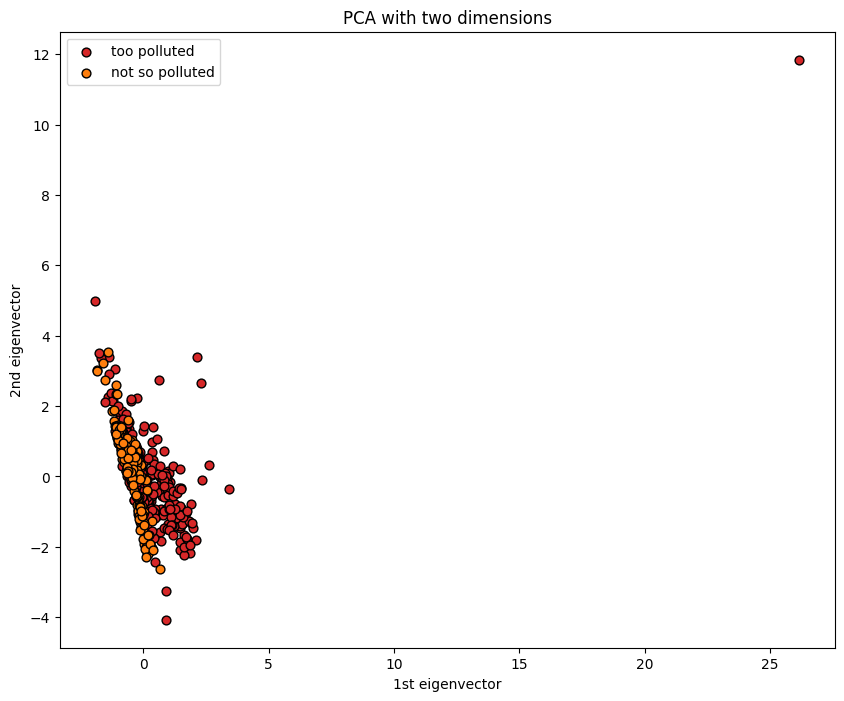

In [39]:
X2 = df1[['Nitrate N + Nitrite N(mg/L) (Min)','Fecal Coliform (MPN/100ml) (Min)','Total Coliform (MPN/100ml) (Min)']]

scaler = StandardScaler() # This creats a new OBJECT that has methods and attributes
scaler.fit(X2) # Ask our scaler to process the data and calculate all parameteres necessary for the scaling (the means and variances)

Xcentred2 = scaler.transform(X2) # Now ask our scaler to scale the data we pass it using the parameters it has calculated

# We can also do the fit and the transform of our data in a single call
Xcentred2 = scaler.fit_transform(X2)
# Like we did before with the scaler, we define here a PCA OBJECT and initialise it with the number of PCA components we want to use
pca = PCA(n_components=3)

# Ask our PCA object to process the data and calculate all parameteres necessary (the eigenvectors and variances)
pca.fit(Xcentred2)

print("\nThese are the calculated components: \n", pca.components_) # The PCA object now contains useful information in its attributes. components_ stores the principal components calculated
print("\nThe components we have found, explain the following percentage of variance: \n", pca.explained_variance_ratio_) # explained_variance_ratio_ stores the percentage of variance each of our components explains

# Now apply the PCA transform on the original data
Xnew2 = pca.transform(Xcentred2)

print("\nOriginal size of our dataset: ", Xcentred2.shape)
print("\nReduced size of our dataset: ", Xnew2.shape)
y2=target_array
target_names = ['too polluted', 'not so polluted']
plot3DScatter(Xnew2, y2)



pca = PCA(n_components=2)
# Ask our PCA object to process the data and calculate all parameteres necessary (the eigenvectors and variances)
pca.fit(Xcentred2)
# Now apply the PCA transform on the original data
Xnew3 = pca.transform(Xcentred2)

y2=target_array
target_names = ['too polluted', 'not so polluted']
plot2DScatter(Xnew3, y2)

#### !!! FIRST CONCLUSION: THIS DATASET IS CAN'T BE USED TO REALISE A CLASSIFICATION USING THE pca ALGORITHM, AS WE SEE THAT THE CLASSES ARE OVERLAPPING EVEN THO WE USE DIFFRENT TARGETS FOR PLOTTING.

#### WE CAN TRY USE K_MEANS AND K_NN AND SEE IF WE CAN SEPARATE THEM INTO CLASSES, IF NOT, WE USE SIMPLE PLOTS TO HAVE SOME CONCLUSIONS ABOUT THE WATER (NOT AS MANY AS WE GET FROM THE SITE, CAUSE IT'S IRELEVANT TO DO SO MUCH)

In [40]:
df2=df1
ph_min = df2['pH (Min)'].to_numpy(float)
ph_max = df2['pH (Max)'].to_numpy(float)
ph_avg = (ph_min+ph_max)/2
df2["pH (Avg)"]=ph_avg

target3 = np.empty_like(ph_avg)
for i in range(len(ph_avg)):
    if ph_avg[i]>6.5 and ph_avg[i]<7.5:
        target3[i] = 1
    else: target3[i] = 0

df2['target']=target3
df2

,Name of Monitoring Location,Type Water Body,Dissolved Oxygen (mg/L) (Min),pH (Min),pH (Max),BOD (mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Min),Fecal Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Min),target,pH (Avg)
0,"KOLLERU LAKE KOKKIRAYALANKA (V), KAILALUR (M)",LAKE,3.2,7.0,8.0,1.6,1.02,9.0,120.0,0.0,7.50
366,"JALMAHAL, JAIPUR, RAJASTHAN",LAKE,0.5,8.5,9.2,3.2,2.5,93.0,210.0,0.0,8.85
365,"JAISAMAND LAKE, SALUMBER, UDAIPUR, POINT NO. 2...",LAKE,7.2,8.4,8.9,1.3,1.42,39.0,64.0,0.0,8.65
364,"JAISAMAND LAKE, SALUMBER, UDAIPUR, POINT NO. 1...",LAKE,7.1,8.3,9.0,1.2,1.66,23.0,75.0,0.0,8.65
363,"JAISAMAND LAKE, ALWAR, RAJASTHAN",LAKE,4.0,7.2,7.2,1.0,0.74,23.0,64.0,1.0,7.20
...,...,...,...,...,...,...,...,...,...,...,...
44,"BOR BEEL AT JAKAI., ASSAM",POND,4.0,7.2,7.8,2.0,0.6,300.0,610.0,0.0,7.50
45,BORPUKHURI AT SONARI,POND,5.8,6.8,8.0,2.0,0.6,300.0,360.0,1.0,7.40
46,"BORPUKHURI, NAZIRA, ASSAM",POND,5.6,6.9,7.7,2.0,0.7,300.0,300.0,1.0,7.30
48,"CHAND DUBI BEEL, CHAND DUBI, ASSAM",POND,4.6,7.2,7.7,2.1,0.7,300.0,720.0,1.0,7.45


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) #Keep 25% of the data as the test set

print(X_train.shape)
print(np.unique(y_train))
print(X_test.shape)
print(np.unique(y_test))

(411, 6)
[0 1 2 3]
(137, 6)
[0 1 2 3]


In [72]:
nit = df['Nitrate N + Nitrite N(mg/L) (Min)'].to_numpy(float)
maximum_nit = nit.max()
if(maximum_nit>50):
    print(f"We don't have potable water in this dataset, according to the Nitrate N + Nitrite N(mg/L) (Min) value: {maximum_nit}")
else:
    print(f"We might have potable water in this dataset, according to the 'Nitrate N + Nitrite N(mg/L) (Min)' value: {maximum_nit}")

We might have potable water in this dataset, according to the 'Nitrate N + Nitrite N(mg/L) (Min)' value: 24.37


#### WE CAN SAY THAT, ACCORDING TO THE NITRITE + NITRATE VALUE, WE MIGHT HAVE DRINKABLE WATER.

#### WE ARE GOING TO CLASSIFY THE WATER RESERVE USING THE pH AVERAGE AND THE NITRATE AS THESE COLUMNS HAVE VALUES THAT ALLOW US TO INTERPRET THE DATA

#### IN THIS REGARD, WE CAN SAY THAT A RESERVE CAN HAVE GOOD WATER IF THE pH AVERAGE IS IN THE LIMIT OF 6.5 AND 7.5. THIS DOESN'T MEAN THAT IT IS INDEED GOOD FOR DRINKING, BUT IT HAS, SOMEHOW, MORE QUALITY IN IT BEFORE BEING PROCESSED AND GIVEN TO THE POPULATION.

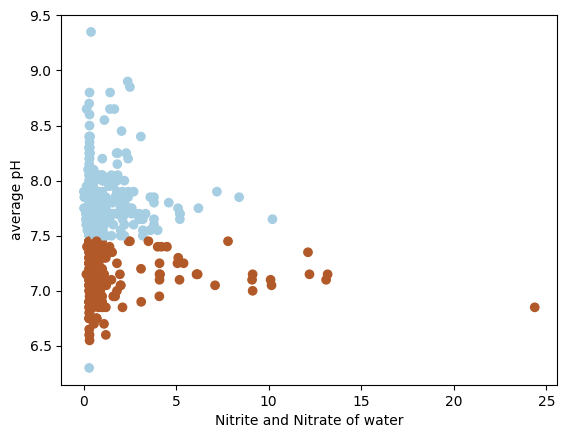

In [43]:
columns = ["Nitrate N + Nitrite N(mg/L) (Min)", "pH (Avg)"]
X = df2[columns].values
y = df2.target

plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.Paired) # Note that we use the value of our class as the index of a colour in our colour map
plt.xlabel('Nitrite and Nitrate of water')
plt.ylabel('average pH')
plt.show()


#### AS WE CAN SEE, THE AMOUNT OF WATER THAT IS BAD (THE BLUE BULLETS) IS BIGGER THAN THE AMOUNT OF POSSIBLY GOOD WATER.
#### WE ARE GOING TO TAKE SOME DATA FROM THE ORIGINAL DATASET (BEFORE SCRUBING IT) AND SEE IF WE CAN PREDICT CORRECTLY WHERE THAT WATER BODY IS SITUATED ACCORDING TO THE pH AVERAGE AND NITRATE AND NITRITE VALUES (WITHOUT KNOWING THE AMOUNT OF POLUTION).

In [44]:

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9562043795620438

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        76
         1.0       0.95      0.95      0.95        61

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137


Confusion Matrix:
 [[73  3]
 [ 3 58]]


In [66]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 20, 30, 33, 50], 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'n_neighbors': 11, 'weights': 'distance'}


In [55]:
def plot_classifier_boundary(clf, X, y, ax = None):

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    # If the user has given us a axis, use this axis to plot stuff, otherwise, create a new figure
    if (ax == None):
        fig, ax = plt.subplots()
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.6)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    ax.set_xlabel('Nitrite and Nitrate of water')
    ax.set_ylabel('average pH')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())


Train Accuracy: 0.9562043795620438

Train Accuracy: 0.9708029197080292

Train Accuracy: 0.9708029197080292

Train Accuracy: 0.9635036496350365

Train Accuracy: 0.9781021897810219

Train Accuracy: 0.9781021897810219


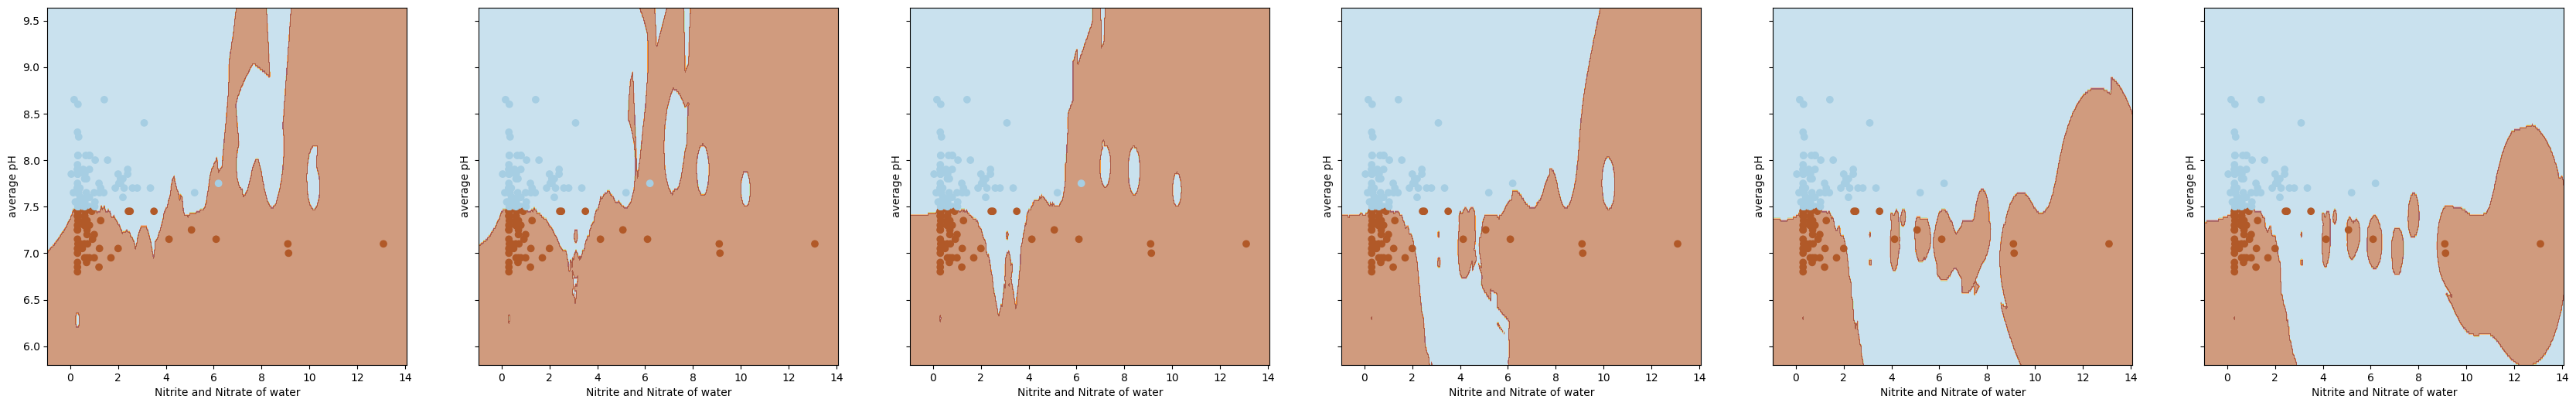

In [60]:
k_range = [5, 11, 20, 50, 70, 80]

fig, ax = plt.subplots(1, len(k_range), figsize = (7*len(k_range), 6), sharex=True, sharey=True)

k_accuracy = [0]*len(k_range) #this one is for the plot of the accurancy, I computed it in the same for loop
for i in range(len(k_range)):
    knn.set_params(n_neighbors = k_range[i])
    
    plot_classifier_boundary(knn, X_test, y_test, ax[i])
    
    k_accuracy[i] = knn.score(X_test, y_test)
    
    print ("\nTrain Accuracy: " + str(knn.score(X_test, y_test)))

In [61]:
# LET'S SEE THE PERCENTEGE OF BAD WATER AND POSSIBLY GOOD WATER THAT WE HAVE.
counting_bad = 0
counting_poss_good = 0
for i in range(len(target3)):
    if target3[i] == 0:
        counting_bad += 1
    else:
        counting_poss_good += 1
bad_ph_perce = counting_bad/len(target3)
good_ph_perce = counting_poss_good/len(target3)
print("BAD WATER ACCORDING TO pH (%):",bad_ph_perce*100)
print("POSSIBLY GOOD WATER ACCORDING TO pH(%):",good_ph_perce*100)

BAD WATER ACCORDING TO pH (%): 54.56204379562044
POSSIBLY GOOD WATER ACCORDING TO pH(%): 45.43795620437956


In [ ]:
# THE PERCENTAGE DOES NOT LOOK THAT BAD, BUT NOW LET'S SEE WHAT RESERVES ARE HIGHLY POLLUTED AND SEE WHAT IS
# THE NEW PERCENTAGE
# IN OUR RESEARCH, WE CONCLUDED THAT:
# FOR DRINKABLE WATER, THE TOTAL COLIFORM IS: 0
# FOR NON-DRINKABLE WATER, WE STRUCTURE IT THIS WAY:
#            --> [1-10]: LOW RISK AFTER TREATING THE WATER --> BASIC TREATMENT REQUIRED
#            --> [11, 100]: MODERATE RISK --> ADVENCED TREATMENT REQUIRED
#            --> >=100: HIGH RISK --> UNSAFE

In [74]:
#LET'S SEE THE PERCENTAGE OF WATER ACCORDING TO THE TOTAL COLIFORM:
drinkable = 0
low = 0
moderate = 0
high = 0

for i in range(len(total_coli)):
    if total_coli[i] == 0:
        drinkable += 1
    elif total_coli[i]>0 and total_coli[i]<=10:
        low += 1
    elif total_coli[i]>10 and total_coli[i]<=100:
        moderate += 1
    else:
        high +=1
drinkable /= len(total_coli)
drinkable *=100
low /=len(total_coli)
low *=100
moderate /= len(total_coli)
moderate *=100
high /= len(total_coli)
high *=100

print(f"Drinkable water directly from the source: {drinkable}")
print(f"It needs basic treatment: {low}")
print(f"It needs advanced treatment: {moderate}")
print(f"It represents a risk even after the treatment: {high}")


Drinkable water directly from the source: 0.0
It needs basic treatment: 5.109489051094891
It needs advanced treatment: 22.26277372262774
It represents a risk even after the treatment: 72.62773722627736


#### The way the report looks, we can say that a small percentage of water reserves could be counted as potential source of tap water. These are the ones with low and moderate risk. 

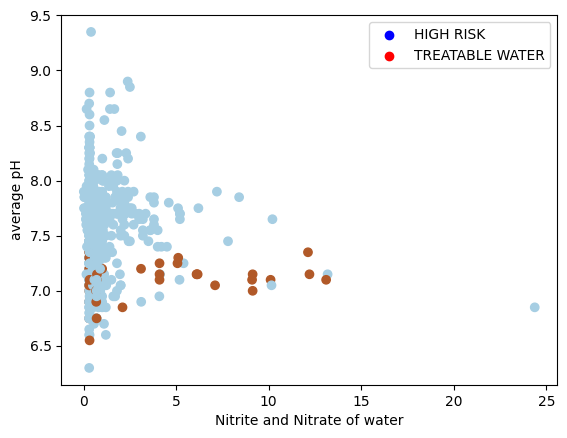

In [75]:
# LET'S START CHANGE THE CLASSIFYING:
# IF THE RESERVE IS IN THE MODERATE CLASS AND IT'S A POSSIBLY GOOD WATER, IT REMAINS ON THAT CATEGORY
# IF NOT, WE CHANGE IT TO BAD WATER

for i in range(len(target3)):
    if total_coli[i]>=100 and target3[i]==1:
        target3[i]=0
df2["target"]=target3

columns = ["Nitrate N + Nitrite N(mg/L) (Min)", "pH (Avg)"]
X = df2[columns].values
y = df2.target

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Legend
water_type_1_patch = plt.scatter([], [], c='blue', label='HIGH RISK')
water_type_2_patch = plt.scatter([], [], c='red', label='TREATABLE WATER')
plt.legend(handles=[water_type_1_patch, water_type_2_patch])

plt.xlabel('Nitrite and Nitrate of water')
plt.ylabel('average pH')
plt.show()